Q1. First Let's create a class for our doubly linked list

In [3]:
class ListNode:
    def __init__(self, key=None, value=None, nextp=None, prev=None):
        self.key = key
        self.value = value
        self.next = nextp
        self.prev = prev

    def getValue(self):
        return self.value

    def getNext(self):
        return self.next

    def setValue(self, value):
        self.value = value

    def setNext(self, nextp):
        self.next = nextp

    def getKey(self):
        return self.key

    def getPrev(self):
        return self.prev

    def setKey(self, key):
        self.key = key

    def setPrev(self, prev):
        self.prev = prev

class List:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

    def insert(self, key, value):
        if key is None or value is None:
            return None
        node = ListNode(key=key,value=value)
        if self.head is None and self.tail is None:
            self.head = self.tail = node
        else:
            temp = self.head
            self.head = node
            node.next = temp
            temp.prev = node
        self.length = self.length + 1

    def delete(self, node):
        if self.head == node and self.tail == node:
            self.head = self.tail = node.next = node.prev = None
        elif self.head == node:
            temp = self.head
            self.head = self.head.next
            self.head.prev = None
            temp.next = None
            temp.prev = None
        elif self.tail == node:
            self.tail = node.prev
            self.tail.next = None
            node.prev = None
            node.next = None
        else:
            prevNode = node.prev
            nextNode = node.next
            prevNode.next = nextNode
            nextNode.prev = prevNode
            node.next = node.prev = None
        self.length = self.length - 1

    def find(self, key):
        temp = self.head
        result = None
        while temp is not None:
            if temp.getKey() == key:
                result = temp
                break
            temp = temp.getNext()
        return result

    def list_all_keys(self):
        temp = self.head
        result = []
        while temp is not None:
            result.append(temp.getKey())
            temp = temp.getNext()
        return result

Now Let's create Hash Table

In [4]:
class Customhash:
    def __init__(self, initialSize=10):
        self.maxHash = initialSize
        self.table = [None] * self.maxHash
        self.collisions = 0

    def getHash(self, key=""):
        asciiSum = 0
        for ind in range(len(key)):
            c = ord(key[ind])
            c = c * (ind * ind)
            asciiSum = asciiSum + c
        hashKey = (asciiSum % self.maxHash)
        return hashKey

    def findPrivate(self, key):
        hashKey = self.getHash(key)
        temp = self.table[hashKey]
        if temp is None:
            return None
        result = temp.find(key)
        if result is None:
            return None
        return result

    def insert(self, key, value):
        hashKey = self.getHash(key)
        temp = self.table[hashKey]
        if temp is None:
            self.table[hashKey] = temp = List()
            temp.insert(key=key,value=value)
        else:
            self.collisions = self.collisions + 1
            result = temp.find(key)
            if result is None:
                temp.insert(key,value)
            else:
                result.setValue(value)

    def increase(self, key):
        result = self.findPrivate(key)
        if result is None:
            return 1
        else:
            temp = result.getValue()
            temp = temp + 1
            result.setValue(temp)
        return 0

    def find(self, key):
        result = self.findPrivate(key)
        if result is None:
            return None
        return result.getKey(),result.getValue()

    def delete(self, key):
        hashKey = self.getHash(key)
        temp = self.table[hashKey]
        if temp is None:
            return 0
        else:
            result = temp.find(key)
            temp.delete(result)
        return 0

    def list_all_keys(self):
        result = []
        for key in range(self.maxHash):
            list = self.table[key]
            if list is None:
                continue
            tempKeys = list.list_all_keys()
            result = result + tempKeys
        return result

Now, Let's program using this Hashtable

key :5, value:1
key :s, value:2
key :mississippi, value:1
key :permanent, value:1
key :2, value:1
key :c, value:1
key :b, value:2
key :production, value:1
key :demand, value:1
key :punitive, value:1
key :disclaim, value:1
key :inaccurate, value:1
key :3, value:3
key :4, value:3
key :legally, value:1
key :format, value:4
key :freely, value:4
key :destroy, value:2
key :1, value:2
key :domain, value:8
key :formats, value:2
key :fortytwo, value:1
key :summer, value:1
key :thunderstorm, value:1
key :beheading, value:1
key :picked, value:2
key :relieved, value:1
key :fire, value:2
key :inside, value:1
key :raising, value:1
key :thoughtfully, value:1
key :unpleasant, value:1
key :hookah, value:3
key :feeble, value:1
key :w, value:1
key :fetch, value:2
key :where, value:7
key :walking, value:2
key :judge, value:3
key :d, value:1
key :apiece, value:1
key :hurriedly, value:2
key :course, value:7
key :hate, value:1
key :doesnt, value:3
key :o, value:2
key :narrow, value:1
key :trotting, value:2
k

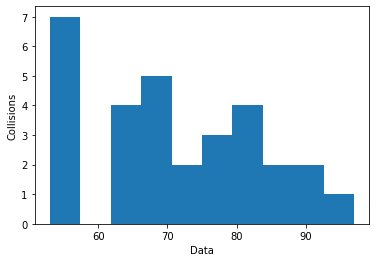

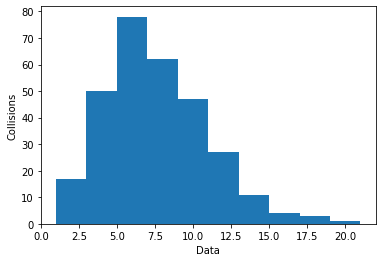

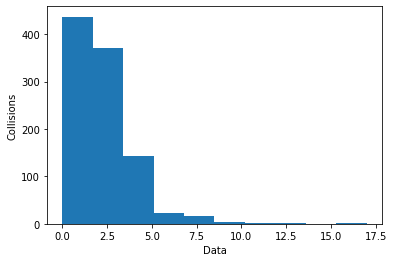

In [7]:
import nltk
import string
from matplotlib import pyplot as plt
nltk.download('all', quiet=True)
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
text = []
with open('/home/shashi/Shashi/Development/northeastern/Algorithms/alice_in_wonderland.txt','r', encoding="ISO-8859-1") as f:
    for line in f:
        for word in line.split():
           text.append(word)
for index in range(len(text)):
    text[index] = text[index].lower()
    text[index] = "".join([char for char in text[index] if char not in string.punctuation])
hashTable = Customhash(30)
hashTable1 = Customhash(300)
hashTable2 = Customhash(1000)
for i in range(len(text)):
    if hashTable.find(text[i]) is None:
        hashTable.insert(text[i], 1)
        hashTable1.insert(text[i], 1)
        hashTable2.insert(text[i], 1)
    else:
        hashTable.increase(text[i])
        hashTable1.increase(text[i])
        hashTable2.increase(text[i])
result1 = hashTable.list_all_keys()
for val in result1:
    tupleVal = hashTable.find(val)
    print("key :{}, value:{}".format(tupleVal[0],tupleVal[1]))

alpha = len(result1)/30
alpha1 = len(result1)/300
alpha2 = len(result1)/1000

hash1Length = []
hash2Length = []
hash3Length = []
for item in hashTable.table:
    if item is None:
        hash1Length.append(0)
    else:
        hash1Length.append(item.length)

for item in hashTable1.table:
    if item is None:
        hash2Length.append(0)
    else:
        hash2Length.append(item.length)

for item in hashTable2.table:
    if item is None:
        hash3Length.append(0)
    else:
        hash3Length.append(item.length)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(hash1Length)
ax1.set_xlabel('Data')
ax1.set_ylabel('Collisions')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(hash2Length)
ax2.set_xlabel('Data')
ax2.set_ylabel('Collisions')

fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(hash3Length)
ax3.set_xlabel('Data')
ax3.set_ylabel('Collisions')

def get_variance(arr, total, alphaTemp):
    totalSum = 0
    for item in arr:
        totalSum = totalSum + (item - alphaTemp) ** 2
    totalSum = totalSum/total
    return totalSum

print("variance with 30: {}".format(get_variance(hash1Length,30,alpha)))
print("variance with 300: {}".format(get_variance(hash2Length,300,alpha1)))
print("variance with 1000: {}".format(get_variance(hash3Length,1000,alpha2)))
hash1Length.sort(reverse=True)
hash2Length.sort(reverse=True)
hash3Length.sort(reverse=True)
print("length of longest 10% with 30 : {}".format(hash1Length[:3]))
print("length of longest 10% with 300 : {}".format(hash2Length[:30]))
print("length of longest 10% with 1000 : {}".format(hash3Length[:100]))

Q2. Let's create nodes for red black tree

In [7]:
class TreeNode:
    def __init__(self, color="black", left=None, right=None, parent=None, key=None, value = None):
        self.color = color
        self.left = left
        self.right = right
        self.parent = parent
        self.key = key
        self.value = value


Now, Let's create red black tree using this TreeNode

In [8]:
class RedBlackTree:
    def __init__(self, root=None):
        self.nil = TreeNode()
        self.root = self.nil
        self.COUNT = [10]
    def search(self,key):
        current = self.root
        while current != self.nil and key != current.key:
            if key < current.key:
                current = current.left
            else:
                current = current.right
        return current
    def minimum(self, node = None):
        if node is None:
            node = self.root
        while node.left != self.nil:
            node = node.left
        return node
    def maximum(self, node = None):
        if node is None:
            node = self.root
        while node.right != self.nil:
            node = node.right
        return node
    def successor(self, node = None):
        if node.right != self.nil:
            return self.minimum(node.right)
        res = node.parent
        while res != self.nil and node == res.right:
            node = res
            res = res.parent
        return res
    def predecessor(self, node = None):
        if node.left != self.nil:
            return self.maximum(node.left)
        res = node.parent
        while res != self.nil and node == res.left:
            node = res
            res = res.parent
        return res
    def rec_sort(self, node, arr):
        if node.left != self.nil:
            self.rec_sort(node.left, arr)
        arr.append(node)
        if node.right != self.nil:
            self.rec_sort(node.right, arr)
    def sort(self):
        node = self.root
        result = []
        self.rec_sort(node, result)
        return result
    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.nil:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == self.nil:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
    def right_rotate(self,y):
        x = y.left
        y.left = x.right
        if x.right != self.nil:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == self.nil:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x

    def height_tree(self, node=None):
        if node is None:
            node = self.root
        if node == self.nil:
            return 0
        else:
            left_sub_tree_height = self.height_tree(node.left)
            right_sub_tree_height = self.height_tree(node.right)
            if left_sub_tree_height > right_sub_tree_height:
                return left_sub_tree_height + 1
            else:
                return right_sub_tree_height + 1

    def insert_fixup(self, z):
        while z.parent.color == "red":
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right
                if y.color == "red":
                    z.parent.color = "black"
                    y.color = "black"
                    z.parent.parent.color = "red"
                    z = z.parent.parent
                else:
                    if z == z.parent.right:
                        z = z.parent
                        self.left_rotate(z)
                    z.parent.color = "black"
                    z.parent.parent.color = "red"
                    self.right_rotate(z.parent.parent)
            else :
                y = z.parent.parent.left
                if y.color == "red":
                    z.parent.color = "black"
                    y.color = "black"
                    z.parent.parent.color = "red"
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.right_rotate(z)
                    z.parent.color = "black"
                    z.parent.parent.color = "red"
                    self.left_rotate(z.parent.parent)
        self.root.color = "black"


    def insert(self, key):
        z = TreeNode(color="red", key = key)
        y = self.nil
        x = self.root
        while x != self.nil:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z.parent = y
        if y == self.nil:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
        z.left = self.nil
        z.right = self.nil
        z.color = "red"
        self.insert_fixup(z)

    def transplant(self, u,v):
        if u.parent == self.nil:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def delete_fixup(self, x):
        while x != self.root and x.color == "black":
            if x == x.parent.left:
                w = x.parent.right
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.left_rotate(x.parent)
                if w.left.color == "black" and w.right.color == "black":
                    w.color = "red"
                    x = x.parent
                else:
                    if w.right.color == "black":
                        w.left.color = "black"
                        w.color = "red"
                        self.right_rotate(w)
                        w = x.parent.right
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.right.color = "black"
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.right_rotate(x.parent)
                if w.right.color == "black" and w.left.color == "black":
                    w.color = "red"
                    x = x.parent
                else:
                    if w.left.color == "black":
                        w.right.color = "black"
                        w.color = "red"
                        self.left_rotate(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.left.color = "black"
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = "black"

    def delete(self, z):
        y = z
        y_original_color = y.color
        if z.left == self.nil:
            x = z.right
            self.transplant(z,z.right)
        elif z.right == self.nil:
            x = z.left
            self.transplant(z,z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y,y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z,y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == "black":
            self.delete_fixup(x)






In [9]:
numbers = []
# this accepts comma seperated numbers from a file
with open('/home/shashi/Shashi/Development/northeastern/Algorithms/numbers.txt','r', encoding="ISO-8859-1") as f:
    for line in f:
        for word in line.split():
            numbers = numbers + word.split(",")


tree = RedBlackTree()

for number in numbers:
    tree.insert(int(number))

stop = False
while stop is not True:
    print("Tree generated, now press 1 for insert, 2 for sort and 3 for search. any other value to quit")

    input1 = int(input())
    if 1 <= input1 <= 3:
        print("Now enter the value")
        input2 = int(input())
        if input1 == 1:
            input2 = input2
            tree.insert(input2)
        elif input1 == 2:
            result = tree.sort()
            for number in result:
                print(number)
        elif input1 == 3:
            result = tree.search(input2)
            print(result)
        print("Height of tree now is :{}".format(tree.height_tree()))
    else:
        stop = True

Tree generated, now press 1 for insert, 2 for sort and 3 for search. any other value to quit
Now enter the value
Height of tree now is :7
Tree generated, now press 1 for insert, 2 for sort and 3 for search. any other value to quit


Q3. Skip list implementation

In [45]:
import random
import math
class SkipListNode:
    def __init__(self, key=None, nextNode=None, top = None, down=None):
        self.key = key
        self.next = nextNode
        self.top = top
        self.down = down

class SkipList:
    def __init__(self, maxLevel = 50):
        self.maxLevels = maxLevel
        self.headarr = []
        self.tailarr = []


    def getChoice(self):
        choice = random.choice([1,2,3])
        if choice == 1:
            choice = True
        else:
            choice = False
        return choice

    def create_node(self, key):
        prevDown = None
        loop = True
        counter = 0
        while loop is True and counter < self.maxLevels:
            newNode = SkipListNode(key=key)
            if counter > 0:
                newNode.down = prevDown
                prevDown.top = newNode
            prevDown = newNode
            counter = counter + 1
            loop = self.getChoice()
        return prevDown, counter

    def inc_sent(self, maxCount):
        sent_len = len(self.headarr)
        for ind in range(sent_len, maxCount):
            head = SkipListNode(key=float("-inf"))
            tail = SkipListNode(key=float("inf"))
            head.next = tail
            self.headarr.append(head)
            self.tailarr.append(tail)
            if ind > 0:
                self.headarr[ind].down = self.headarr[ind - 1]
                self.headarr[ind - 1].top = self.headarr[ind]
                self.tailarr[ind].down = self.tailarr[ind - 1]
                self.tailarr[ind - 1].top = self.tailarr[ind]

    def insert_rec(self, node, prevNode, nextNode):
        while node.key > nextNode.key:
            prevNode = nextNode
            nextNode = nextNode.next
        prevNode.next = node
        node.next = nextNode
        if prevNode.down is not None:
            node = node.down
            prevNode = prevNode.down
            self.insert_rec(node, prevNode, prevNode.next)


    def insert(self, key):
        node, level = self.create_node(key)
        tempLevel = level
        if tempLevel > len(self.headarr):
            self.inc_sent(tempLevel)
        prevNode = self.headarr[tempLevel - 1]
        nextNode = prevNode.next
        self.insert_rec(node, prevNode, nextNode)

    def find_rec(self, key, prevNode, nextNode, level):
        print("level {}: ".format(level + 1), end=" ")
        print("{} --> {}".format(str(prevNode.key),str(nextNode.key)), end="")
        while nextNode.key < key:
            prevNode = nextNode
            nextNode = nextNode.next
            print("--> {}".format(nextNode.key), end="")
        if key == nextNode.key:
            return nextNode,prevNode
        if prevNode.down is None:
            return None,None
        else:
            prevNode = prevNode.down
            print("")
            return self.find_rec(key, prevNode, prevNode.next, (level-1))

    def find(self, key):
        print("Tracing find path")
        level = len(self.headarr) - 1
        prevNode = self.headarr[level]
        res = self.find_rec(key, prevNode, prevNode.next, level)
        print("")
        return res

    def delete_rec(self, node, prevNode):
        prevNode.next = node.next
        node.next = None
        prevNode = prevNode.down
        node = node.down
        if prevNode is None:
            return
        while prevNode.next != node:
            prevNode = prevNode.next
        self.delete_rec(node,prevNode)


    def delete(self, key):
        node, prevNode = self.find(key)
        self.delete_rec(node, prevNode)


    def print_level(self):
        level = len(self.headarr)
        for lvl in range(level - 1, -1, -1):
            temp = self.headarr[lvl]
            while temp is not None:
                print(temp.key, end =" ")
                temp = temp.next
            print(" ")









In [48]:
skipList = SkipList()
skipList.insert(22)
skipList.insert(23)
skipList.insert(20)
skipList.insert(18)
skipList.insert(15)
skipList.insert(22)
skipList.insert(26)
skipList.insert(100)
skipList.insert(50)
skipList.insert(29)
skipList.insert(1)
skipList.insert(260)
skipList.insert(262)
skipList.insert(230)
skipList.insert(280)
skipList.print_level()
skipList.delete(22)
skipList.print_level()
skipList.insert(22)
skipList.print_level()
item,nextItem = skipList.find(22)
levels = 0
while item is not None:
    levels = levels + 1
    item = item.down
# print(levels)
# skipList.delete(20)
# skipList.print_level()

-inf 22 inf  
-inf 22 100 262 280 inf  
-inf 1 15 18 20 22 22 23 26 29 50 100 230 260 262 280 inf  
Tracing find path
level 3:  -inf --> 22
-inf inf  
-inf 100 262 280 inf  
-inf 1 15 18 20 22 23 26 29 50 100 230 260 262 280 inf  
-inf inf  
-inf 100 262 280 inf  
-inf 1 15 18 20 22 22 23 26 29 50 100 230 260 262 280 inf  
Tracing find path
level 3:  -inf --> inf
level 2:  -inf --> 100
level 1:  -inf --> 1--> 15--> 18--> 20--> 22
